In [1]:
from sklearn.metrics import silhouette_score
import pandas as pd
import numpy as np
import scipy
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import normalize
from sklearn.decomposition import PCA
from sklearn.cluster import MiniBatchKMeans
from sklearn.cluster import KMeans
from sklearn.preprocessing import normalize
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn import metrics
from sklearn.metrics import pairwise_distances
%matplotlib inline

# Data Cleaning and Exploration

In [2]:
#2014

marathon = pd.read_csv('boston.csv')
boston = marathon.sample(frac = .05)
boston.shape

(1599, 21)

In [3]:

boston.head(5)

,10k,name,division,25k,gender,age,official,bib,genderdiv,ctz,...,overall,pace,state,30k,5k,half,20k,country,city,40k
27667,71.28,"Kovacs, Jennifer",6072,187.45,F,25,317.23,31149,12583,NaN,...,28641,12.10,MA,224.15,34.63,154.73,146.55,USA,Jamacia Plain,301.37
5664,45.20,"Ferreri, Anthony V.",342,115.30,M,51,195.57,6449,4774,NaN,...,5405,7.47,NY,138.97,22.30,96.88,91.78,USA,Hyde Park,185.92
832,37.98,"Marshall, Ryan",2078,98.98,M,37,185.57,887,3086,NaN,...,3318,7.08,NH,123.18,18.97,81.98,77.35,USA,Portsmouth,174.62
28547,66.72,"Hay, Gordon",2798,185.48,M,47,331.40,32099,16526,NaN,...,29607,12.65,MA,229.98,33.05,149.43,141.10,USA,Mansfield,313.40
28142,59.53,"Bursell, Jamie L.",1178,154.40,F,51,288.82,31670,11243,NaN,...,25970,11.02,AK,192.62,29.35,127.53,120.72,USA,Juneau,272.13


In [4]:
boston.describe()

,division,age,official,genderdiv,overall,pace
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,1899.539087,42.612883,242.686210,8022.819262,15805.565353,9.264490
std,1675.876964,11.249124,53.403974,4733.902356,9298.681686,2.036035
min,1.000000,18.000000,84.700000,5.000000,5.000000,3.230000
25%,578.500000,34.000000,204.670000,4045.500000,7708.000000,7.820000
50%,1438.000000,43.000000,230.620000,7937.000000,15449.000000,8.800000
75%,2613.000000,51.000000,271.550000,11890.500000,23681.500000,10.370000
max,6974.000000,81.000000,432.270000,17549.000000,31889.000000,16.500000


In [5]:
boston.isnull().sum()

10k             0
name            0
division        0
25k             0
gender          0
age             0
official        0
bib             0
genderdiv       0
ctz          1538
35k             0
overall         0
pace            0
state         121
30k             0
5k              0
half            0
20k             0
country         0
city            0
40k             0
dtype: int64

In [6]:
boston.city.value_counts().head()

Boston        47
New York      30
Cambridge     22
Washington    16
Somerville    16
Name: city, dtype: int64

In [7]:
boston.country.value_counts().head()

USA    1370
CAN     108
JPN      13
GER      12
GBR      11
Name: country, dtype: int64

In [8]:
boston.division.value_counts().head()

1442    4
914     4
1508    3
2299    3
250     3
Name: division, dtype: int64

In [9]:
boston.dtypes

10k           object
name          object
division       int64
25k           object
gender        object
age            int64
official     float64
bib           object
genderdiv      int64
ctz           object
35k           object
overall        int64
pace         float64
state         object
30k           object
5k            object
half          object
20k           object
country       object
city          object
40k           object
dtype: object

In [10]:
#need to remove ' - ' from times and conver tto numeric
time_columns = ['10k','25k','35k','30k','5k','half','20k','40k']
for col in time_columns:
    boston[col]= boston[col].str.replace('-', '')
    boston[col] = pd.to_numeric(boston[col])
    


In [11]:
#drop columns that will be difficult to derive meaning/interprety from. 
boston_new = boston.drop(['name', 'bib', 'ctz', 'state', 'city',\
                         '40k','half','10k','35k','country'],1)
boston_new= boston_new.replace([np.inf, -np.inf], np.nan).dropna(how="any")
boston_new= boston_new.dropna()



In [12]:
# make bonary indicator for gender
boston_new.gender = np.where(boston_new.gender =='M',0,1)
boston_new.gender = pd.to_numeric(boston_new.gender)


In [13]:
boston_upd=boston_new.drop(['gender'],1)

In [14]:
X_norm = normalize(boston_upd)

## time to cluster

In [17]:
# Create arrays for modeling
# We'll use two equally sized groups to test our scores for consistency.


In [18]:
for n_clust in range(2, 10):
    model1 = KMeans(n_clusters=n_clust).fit(X_norm)
    labels1 = model1.labels_
    print('Scores with {} clusters:'.format(n_clust), silhouette_score(X_norm, labels1, metric='euclidean'))

Scores with 2 clusters: 0.437629360309
Scores with 3 clusters: 0.490778667873
Scores with 4 clusters: 0.507047204301
Scores with 5 clusters: 0.402162168502
Scores with 6 clusters: 0.452955451029
Scores with 7 clusters: 0.531458790101
Scores with 8 clusters: 0.537524470298
Scores with 9 clusters: 0.569870336027


In [19]:
#lets go with 9 clusters
#what should i do with X2
model1= KMeans(n_clusters=9).fit(X_norm)
labels = model1.labels_
labels.shape

(1587,)

In [20]:
X_clusters = pd.DataFrame(X_norm, columns = boston_upd.columns)

In [21]:
X_clusters['labels'] =labels

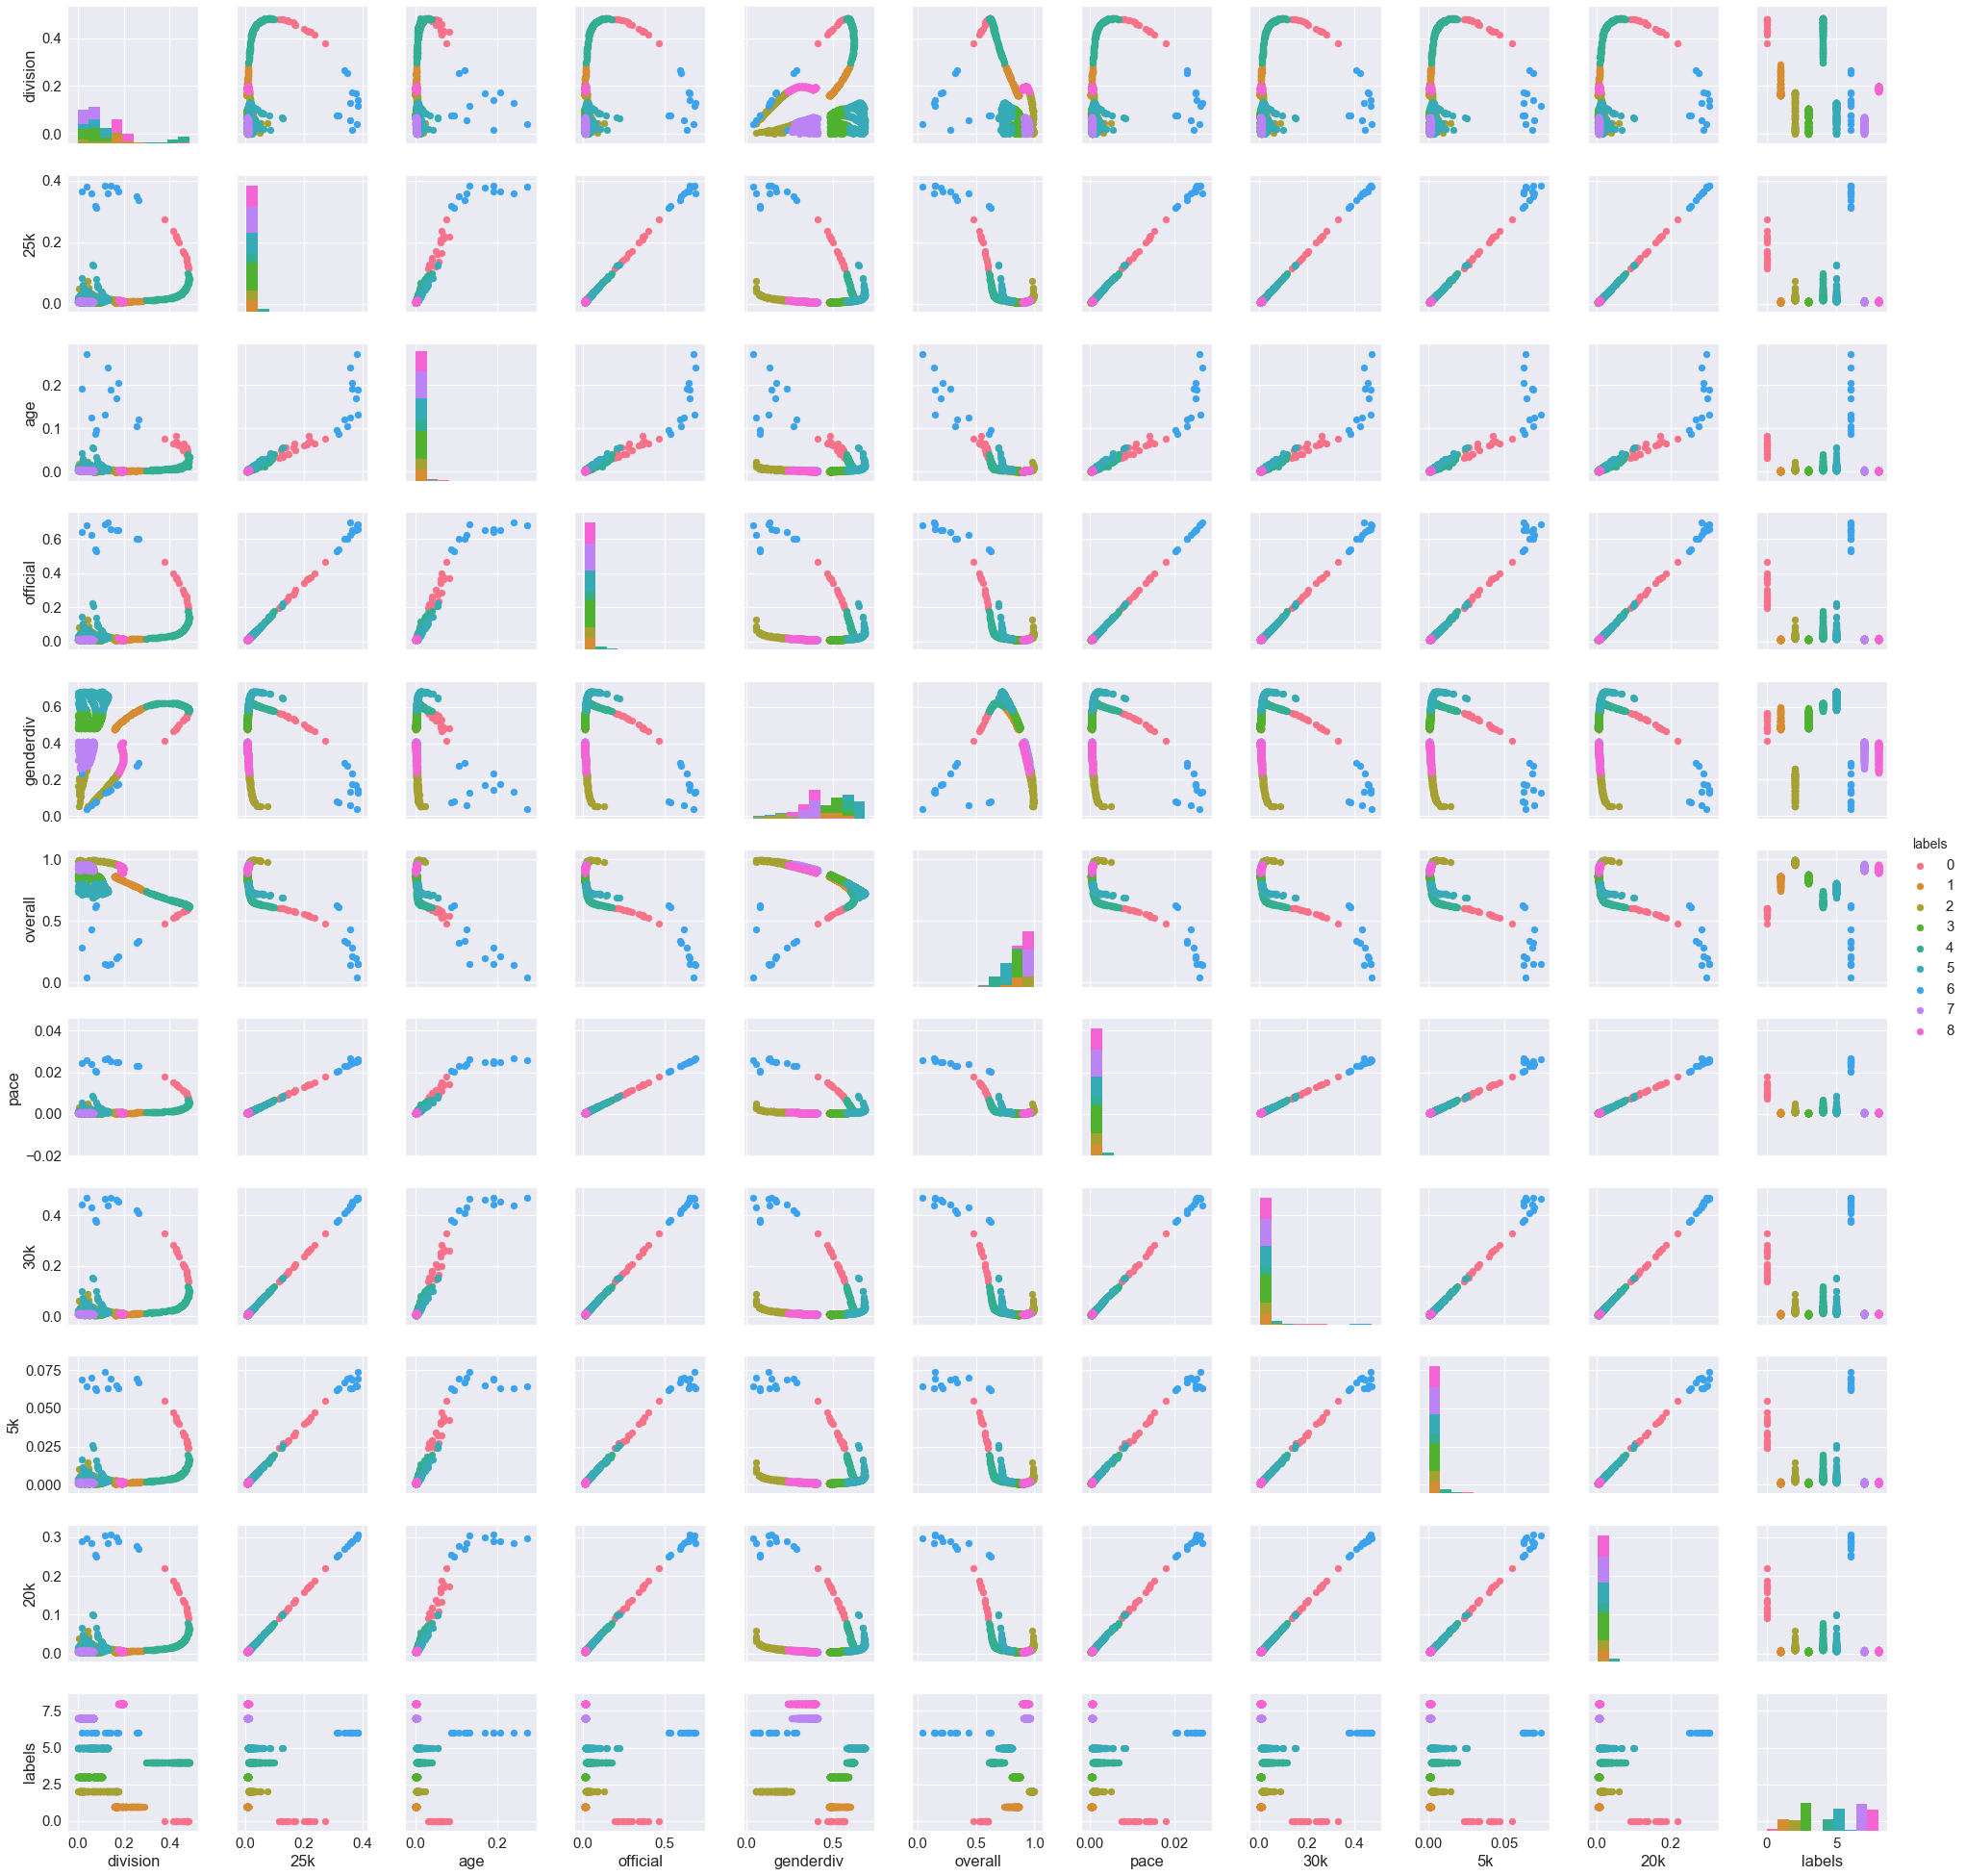

In [22]:
sns.set(font_scale=1.5)
g = sns.PairGrid(X_clusters, hue ='labels')
g = g.map_diag(plt.hist)
g = g.map_offdiag(plt.scatter)
g = g.add_legend()

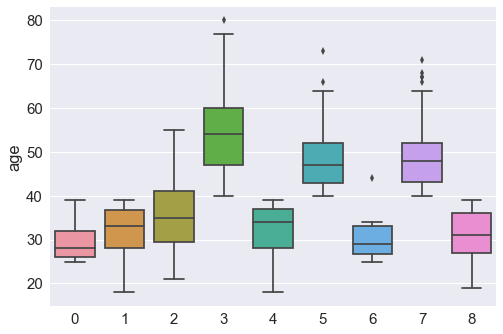

In [23]:
sns.boxplot(labels,boston_upd['age'])
plt.show()

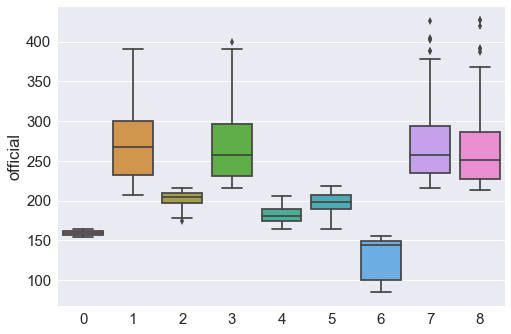

In [24]:
sns.boxplot(labels,boston_upd['official'])
plt.show()

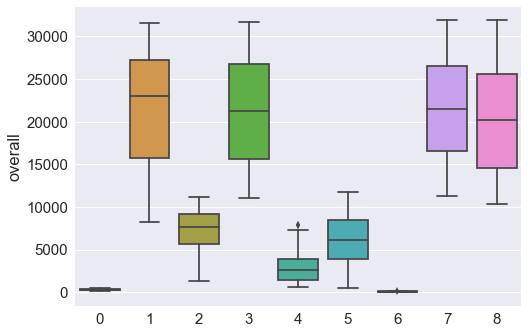

In [25]:
sns.boxplot(labels,boston_upd['overall'])
plt.show()

## mean shift


In [26]:
from sklearn.cluster import MeanShift, estimate_bandwidth
bandwidth = estimate_bandwidth(X_norm, quantile=0.2, n_samples=1000)
ms = MeanShift(bandwidth=bandwidth, bin_seeding=True)
ms.fit(X_norm)
labels = ms.labels_
cluster_centers = ms.cluster_centers_
n_clusters_ = len(np.unique(labels))
print("Number of estimated clusters: {}".format(n_clusters_))
print('Scores with {} clusters:'.format(n_clusters_), silhouette_score(X_norm, labels, metric='euclidean'))

Number of estimated clusters: 8
Scores with 8 clusters: 0.517264699475


In [28]:
X_clusters = pd.DataFrame(X_norm, columns = boston_upd.columns)
X_clusters['labels'] =labels

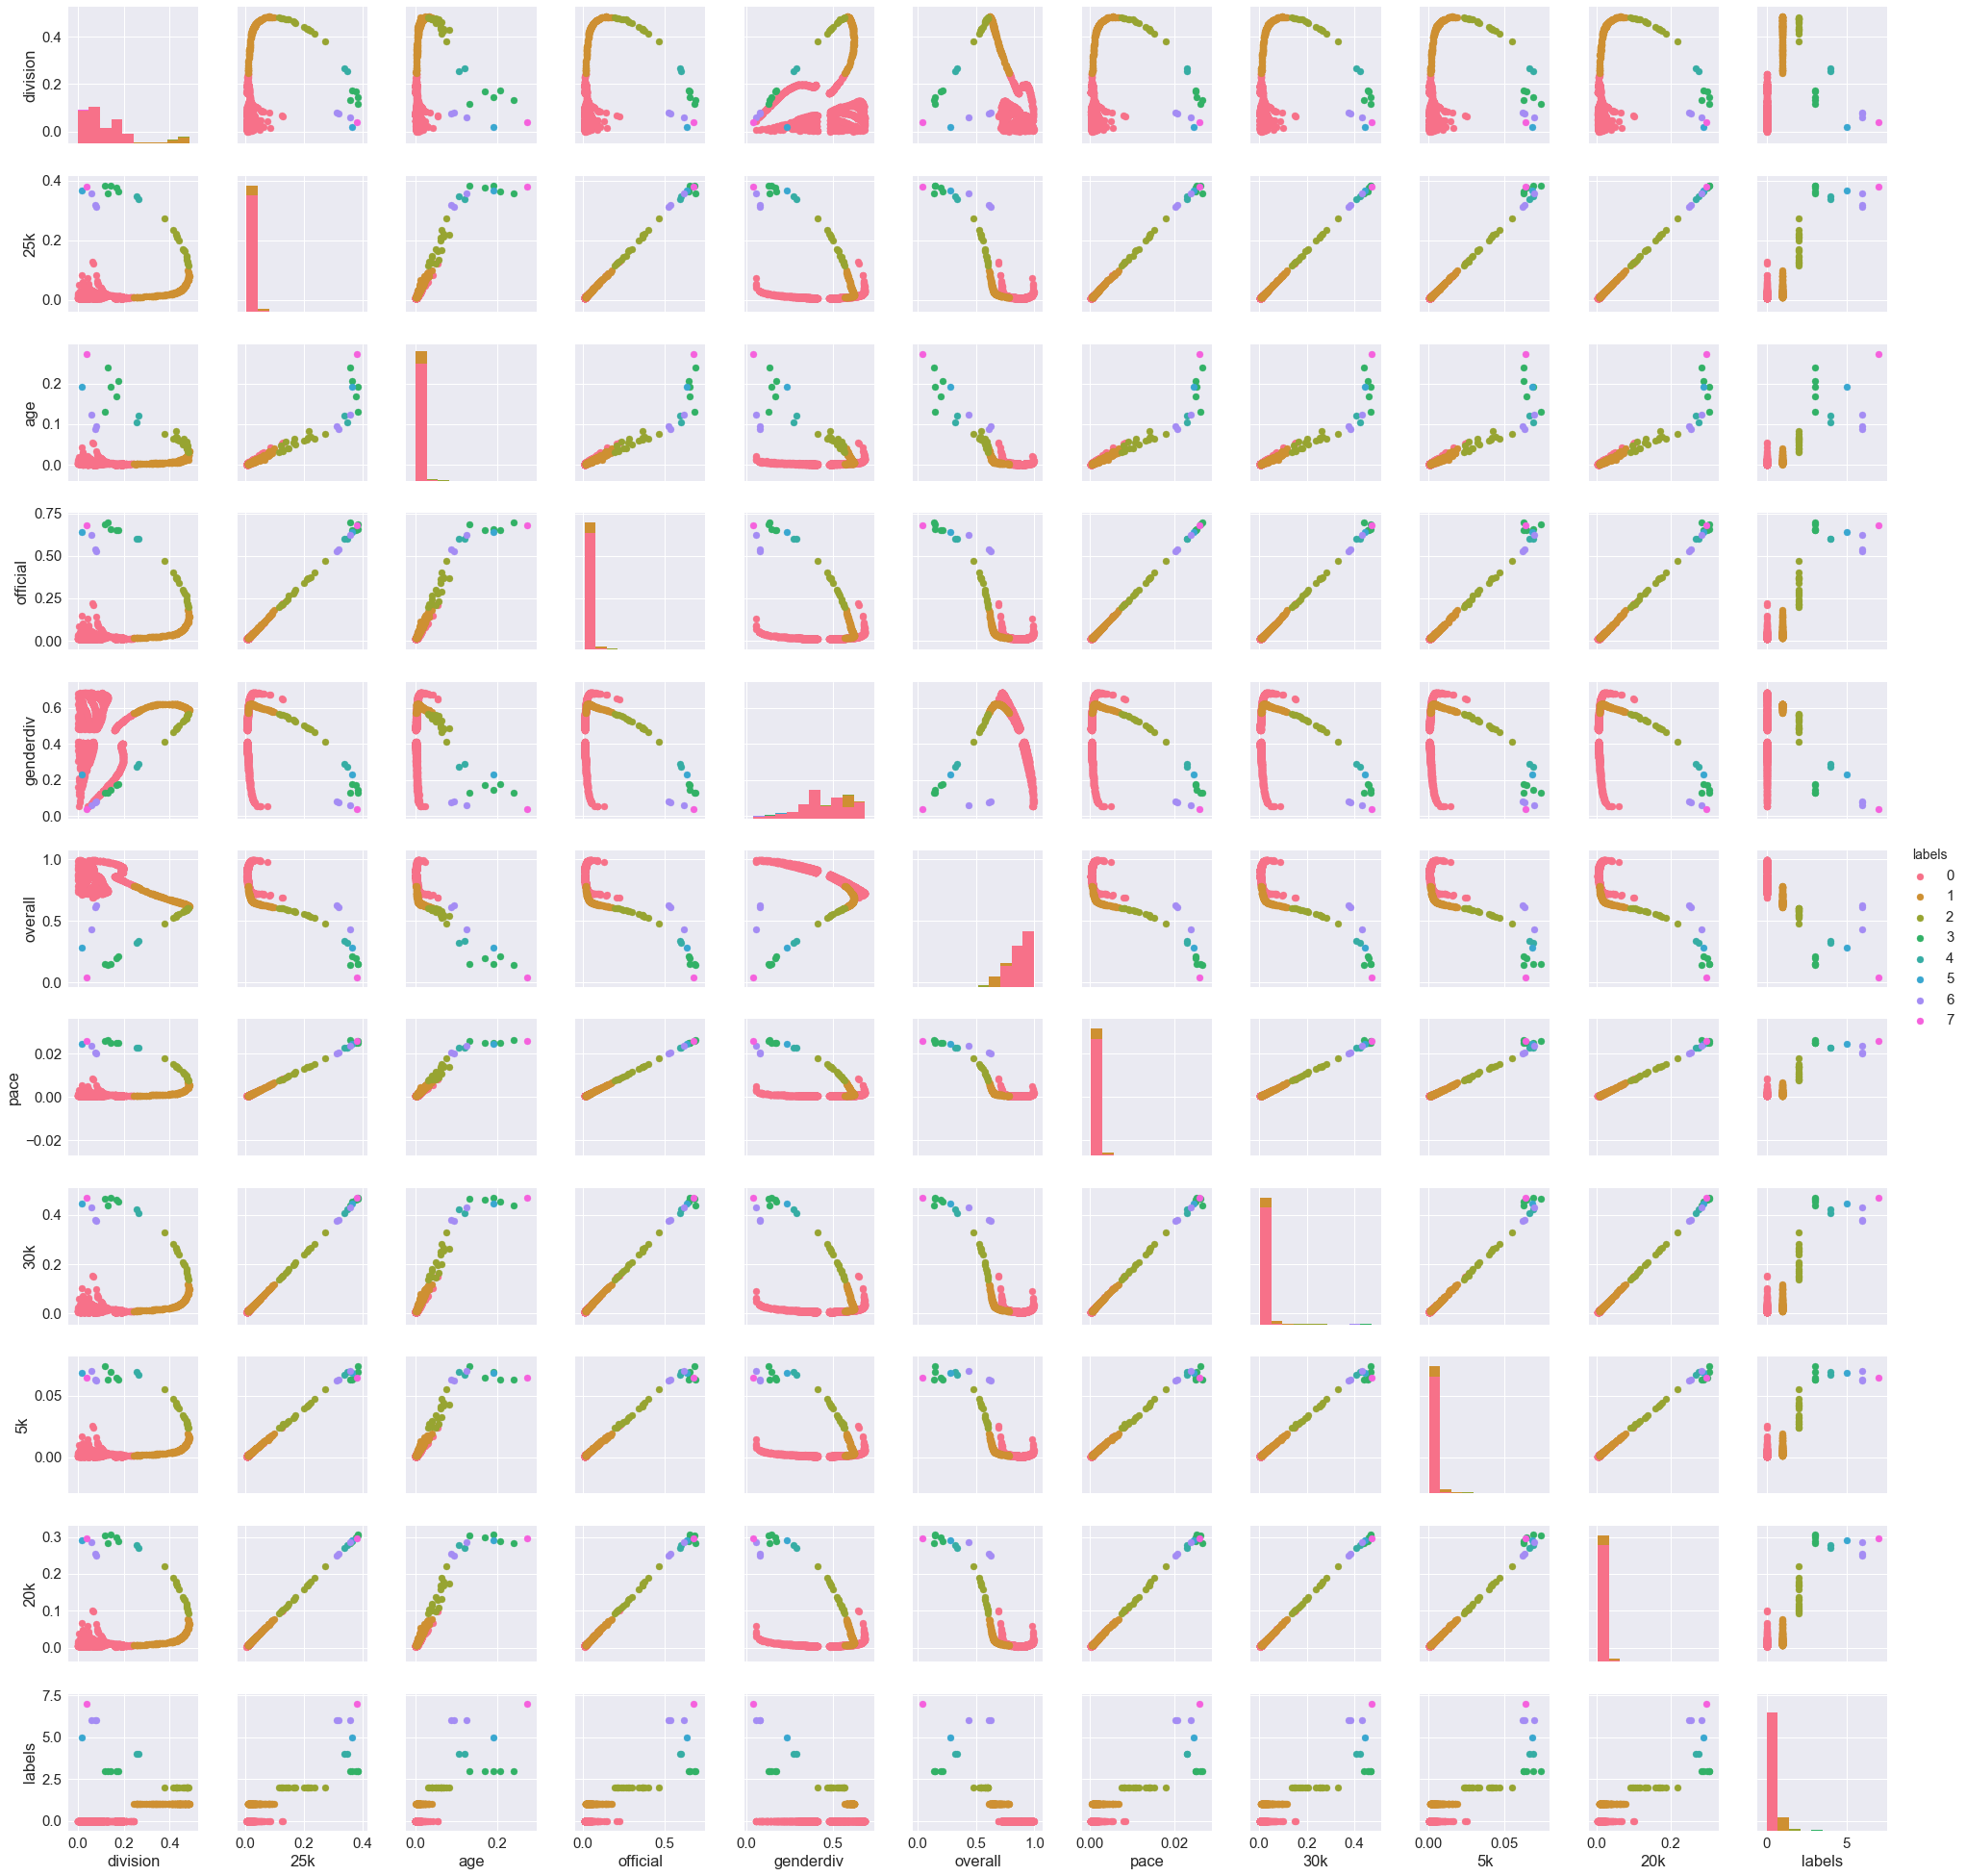

In [29]:
sns.set(font_scale=1.5)
g = sns.PairGrid(X_clusters, hue ='labels')
g = g.map_diag(plt.hist)
g = g.map_offdiag(plt.scatter)
g = g.add_legend()

## affinity

In [30]:
#affinity 
from sklearn.cluster import AffinityPropagation
from sklearn import metrics
af = AffinityPropagation().fit(X_norm)
print('Done')

# Pull the number of clusters and cluster assignments for each data point.
cluster_centers_indices = af.cluster_centers_indices_
n_clusters_ = len(cluster_centers_indices)
labels = af.labels_

print('Estimated number of clusters: {}'.format(n_clusters_))
print('Scores with {} clusters:'.format(n_clusters_), silhouette_score(X_norm, labels, metric='euclidean'))

Done
Estimated number of clusters: 461
Scores with 461 clusters: 0.263676780048


In [31]:
X_clusters = pd.DataFrame(X_norm, columns = boston_upd.columns)

In [32]:
X_clusters['labels'] =labels

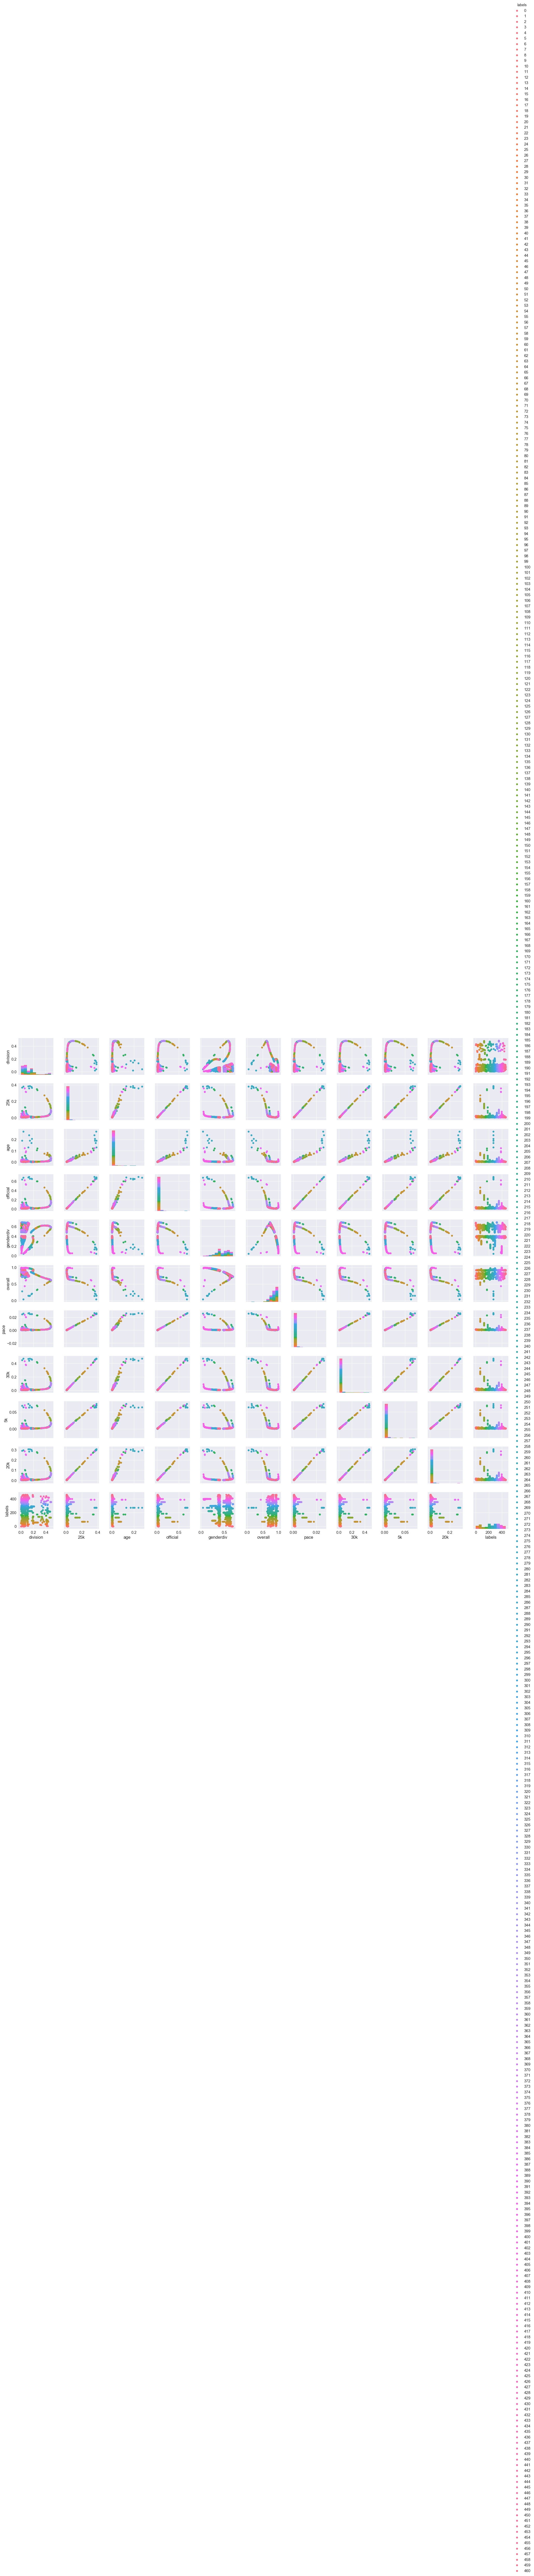

In [33]:
sns.set(font_scale=1.5)
g = sns.PairGrid(X_clusters, hue ='labels')
g = g.map_diag(plt.hist)
g = g.map_offdiag(plt.scatter)
g = g.add_legend()